In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append('../tf/ver1')

DATA_DIR = '/beegfs/ua349/lstm/coco'
from tensorpack.dataflow.common import BatchData, MapData

def batch_dataflow(df, batch_size, time_steps=4, num_stages=6):
        """
        The function builds batch dataflow from the input dataflow of samples

        :param df: dataflow of samples
        :param batch_size: batch size
        :return: dataflow of batches
        """
        df = BatchData(df, batch_size, use_list=False)
        df = MapData(df, lambda x: (
            [
                x[0],
                x[1],
                x[2]
            ],
            [x[3], x[4]]
        ))
        df.reset_state()
        return df

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from training.dataset import get_dataflow

dataset = 'val'
batch_size = 1

def gen(df):
    while True:
        for i in df.get_data():
            yield i

df = get_dataflow(
    annot_path='%s/annotations/person_keypoints_%s2017.json' % (DATA_DIR, dataset),
    img_dir='%s/%s2017/' % (DATA_DIR, dataset))
train_df = batch_dataflow(df, batch_size)
train_gen = gen(train_df)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!
Loading image annot 4000/5000
[0804 17:47:04 @parallel.py:290] [PrefetchDataZMQ] Will fork a dataflow more than one times. This assumes the datapoints are i.i.d.


In [91]:
import numpy as np

for (inp, targets) in train_gen:
    break
target = targets[-1][0].astype(np.float32)

In [92]:
import matplotlib.pyplot as plt

In [93]:
# print(target.shape)

video1 = inp[0][0]
mask1 = inp[2][0]
heat1 = targets[-1][0]
paf1 = targets[-2][0]

print(video1.shape)
print(mask1.shape)
print(heat1.shape)
print(paf1.shape)

(368, 368, 3)
(46, 46, 19)
(46, 46, 19)
(46, 46, 38)


In [94]:
print('Heat range', np.min(heat1), np.max(heat1))
print('Paf range', np.min(paf1), np.max(paf1))

Heat range 0.0 1.0
Paf range -1.0 0.9897


float16
(46, 46)


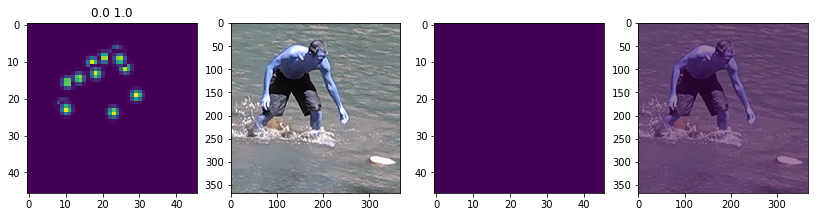

Masked out joints: []


In [95]:
import cv2
import matplotlib.pyplot as plt


print(video1.dtype)
plt.figure(figsize=(14, 14))

plt.subplot(1, 4, 1)
print(heat1[:,:, -1].shape)

canvas = np.zeros((46, 46))
for ii in range(18):
    canvas[heat1[:, :, ii] > 0] = heat1[:, :, ii][heat1[:, :, ii] > 0]

plt.gca().set_title('%.1f %.1f' % (np.min(canvas), np.max(canvas)))
plt.imshow(canvas)

plt.subplot(1, 4, 2)
plt.imshow(video1.astype(np.float32)/256)

plt.subplot(1, 4, 3)
plt.imshow(mask1[:, :, 0])

plt.subplot(1, 4, 4)
plt.imshow(video1.astype(np.float32)/256)
plt.imshow(cv2.resize(mask1[:, :, 0], (0,0), fx=8, fy=8), alpha=0.5)

plt.show()


missing = []
for ii in range(19):
    if np.max(mask1[:, :, ii]) == 0:
        missing.append(ii)
print('Masked out joints:', missing)

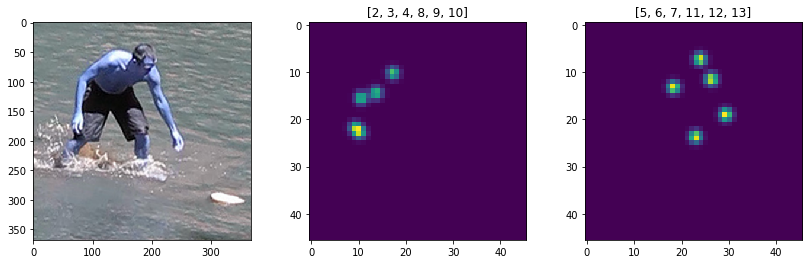

In [96]:
right_joints = [2, 3, 4, 8, 9, 10]
left_joints = [5, 6, 7, 11, 12, 13]

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.imshow(video1.astype(np.float32)/256)

heat = np.zeros(heat1.shape[:2])
for ind in right_joints:
    heat += heat1[:, :, ind]
plt.subplot(1, 3, 2)
plt.gca().set_title('%s'%right_joints)
plt.imshow(heat)

heat = np.zeros(heat1.shape[:2])
for ind in left_joints:
    heat += heat1[:, :, ind]
plt.subplot(1, 3, 3)
plt.gca().set_title('%s'%left_joints)
plt.imshow(heat)

plt.show()
plt.close()

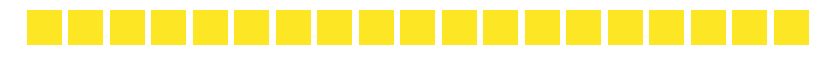

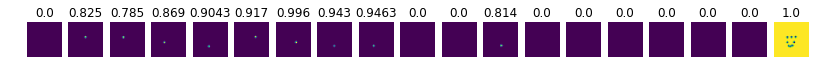

In [8]:

import matplotlib.pyplot as plt



plt.figure(figsize=(14, 14))
for ii in range(19):
    plt.subplot(1, 19, ii+1)
    plt.axis('off')
    plt.imshow(mask1[:, :, ii], vmin=0, vmax=1)

plt.show()

plt.figure(figsize=(14, 14))
for ii in range(19):
    plt.subplot(1, 19, ii+1)
    plt.axis('off')
    plt.gca().set_title(np.max(heat1[:, :, ii]))
    plt.imshow(heat1[:, :, ii].astype(np.float32), vmin=0, vmax=1)

plt.show()

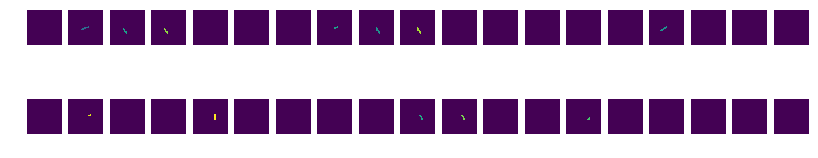

In [19]:
plt.figure(figsize=(14, 3))
for ii in range(38):
    plt.subplot(2, 19, ii+1)
    plt.axis('off')
    plt.imshow(paf1[:, :, ii].astype(np.float32), vmin=0, vmax=1)

plt.show()